In [1]:
pip install -r requirements.txt


In [2]:
pip install opencv-python-headless --use-pep517


In [3]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

# STEP 2: Prepare Dataset
# You can expand this with more samples
english_words = ['apple', 'banana', 'car', 'door', 'elephant', 'flower', 'guitar', 'house', 'island', 'jungle']
non_english_words = ['amor', 'bonjour', 'casa', 'nihao', 'guten', 'konnichiwa', 'marhaba', 'namaste', 'ola', 'salut']

words = english_words + non_english_words
labels = [1]*len(english_words) + [0]*len(non_english_words)  # 1 for English, 0 for Non-English

# STEP 3: Vectorize the words
vectorizer = CountVectorizer(analyzer='char')
X = vectorizer.fit_transform(words)
y = np.array(labels)

# STEP 4: Train the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# STEP 5: Test the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy*100:.2f}%')

# STEP 6: Save Model and Vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('lang_detect_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print('Vectorizer and model saved successfully!')


Model Accuracy: 75.00%
Vectorizer and model saved successfully!


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompletePlease upload an image or video (jpg, png, mp4).


Saving image.jpg to image (1).jpg

Uploaded file: image (1).jpg


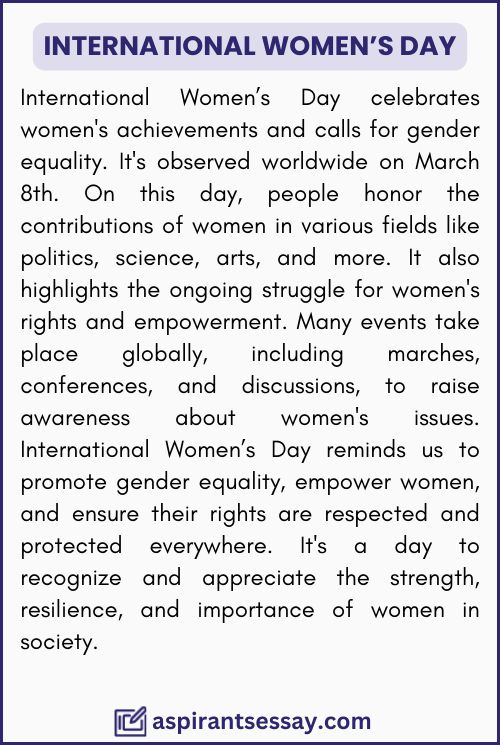


 Extracted English Text from Image:
INTERNATIONAL WOMEN'S DAY International Women's celebrates women's achievements and calls for gender equality_ It's observed worldwide on March 8th. On this people honor the contributions of women in various fields like politics, science, arts, and more_ also highlights the ongoing struggle for women's rights and empowerment: events take place globally, including marches, conferences, and discussions_ to raise awareness about women's issues_ International Women's reminds uS to promote gender equality, empower women, and ensure their rights are respected and protected everywhere_ Its to recognize and appreciate the strength, resilience , and importance of women in society: aspirantsessay.com Day day, Many Day day 


In [4]:
# Step 1: Install required packages
!pip install easyocr opencv-python-headless ffmpeg-python

# Step 2: Import libraries
import easyocr
import cv2
from PIL import Image
from google.colab import files
from IPython.display import display, Image as ColabImage
import tempfile
import os

# Step 3: Initialize OCR Reader for English
reader = easyocr.Reader(['en'])

# Step 4: Upload file (Image or Video)
print("Please upload an image or video (jpg, png, mp4).")
uploaded = files.upload()

for filename in uploaded.keys():
    print(f'\nUploaded file: {filename}')

    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        # Process Image
        display(ColabImage(filename=filename))
        results = reader.readtext(filename)

        extracted_text = ''
        for (bbox, text, prob) in results:
            if all(ord(c) < 128 for c in text):  # Keep only English (ASCII) words
                extracted_text += text + ' '

        if extracted_text.strip() == '':
            print("\n No English text found in the image.")
        else:
            print("\n Extracted English Text from Image:")
            print(extracted_text)

    elif filename.lower().endswith(('.mp4', '.avi', '.mov')):
        # Process Video
        print("\n Processing video. This may take some time...")

        video = cv2.VideoCapture(filename)
        frame_count = 0
        extracted_text = ''

        while True:
            ret, frame = video.read()
            if not ret:
                break
            frame_count += 1

            if frame_count % 30 == 0:  # Process every 30th frame to save time
                temp_filename = 'temp_frame.jpg'
                cv2.imwrite(temp_filename, frame)
                results = reader.readtext(temp_filename)

                for (bbox, text, prob) in results:
                    if all(ord(c) < 128 for c in text):  # Keep only English (ASCII) words
                        extracted_text += text + ' '

        video.release()

        if extracted_text.strip() == '':
            print("\n No English text found in the video.")
        else:
            print("\nExtracted English Text from Video:")
            print(extracted_text)

    else:
        print("\nUnsupported file type. Please upload a jpg, png, or mp4 file.")
